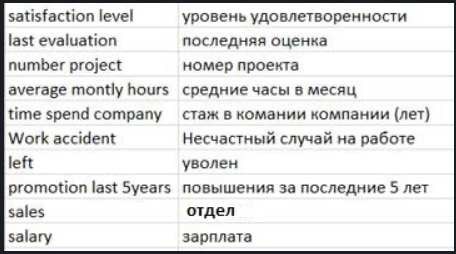

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import stats

Image('descripion.png')

In [203]:
# 1. Загрузить файл hr.csv
data = pd.read_csv('hr.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [204]:
# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


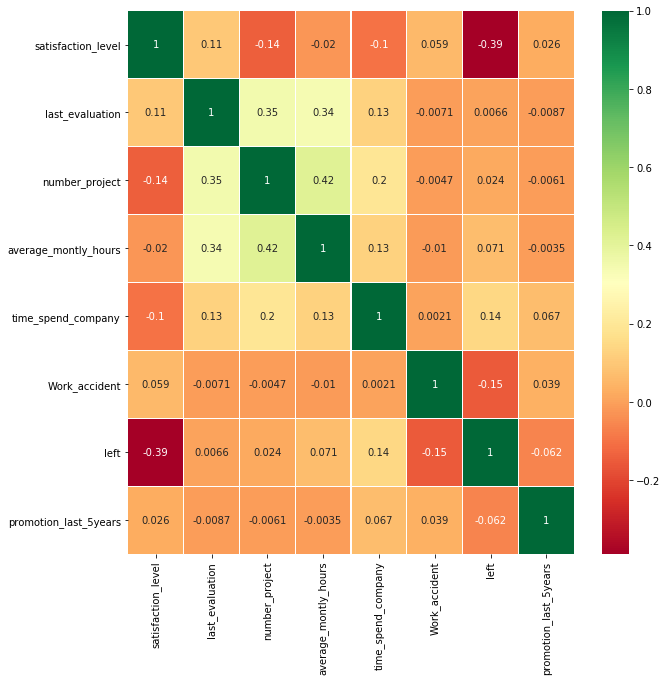

In [206]:
# 3.Рассчитать и визуализировать корреляционную матрицу для переменных
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()
# Матрица показывает нам, что уровень удовлетворенности имеет обратную корреляцию на увольнение сотрудников
# Уровень оценки, напротив никак не влияет на уровольнение
# из этого можно предположить, что они в основном сотрудники увольняются сами

In [208]:
# Но такая матрица корреляции не показывает нам, влияет ли на удовлетворенность и увольнение уровень зарплаты
# Добавим новые поля со значениями 1 и 0, соответствующие разным уровням зарплаты

def salary_low(salary):
    if salary == 'low':
        return 1.0
    else:
        return 0.0
    
def salary_medium(salary):
    if salary == 'medium':
        return 1.0
    else:
        return 0.0
    
def salary_high(salary):
    if salary == 'high':
        return 1.0
    else:
        return 0.0
    
data['salary_low'] = data['salary'].apply(salary_low)
data['salary_medium'] = data['salary'].apply(salary_medium)
data['salary_high'] = data['salary'].apply(salary_high)

data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_low,salary_medium,salary_high
0,0.38,0.53,2,157,3,0,1,0,sales,low,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.0,1.0,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.0,1.0,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,1.0,0.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,support,low,1.0,0.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,support,low,1.0,0.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,support,low,1.0,0.0,0.0


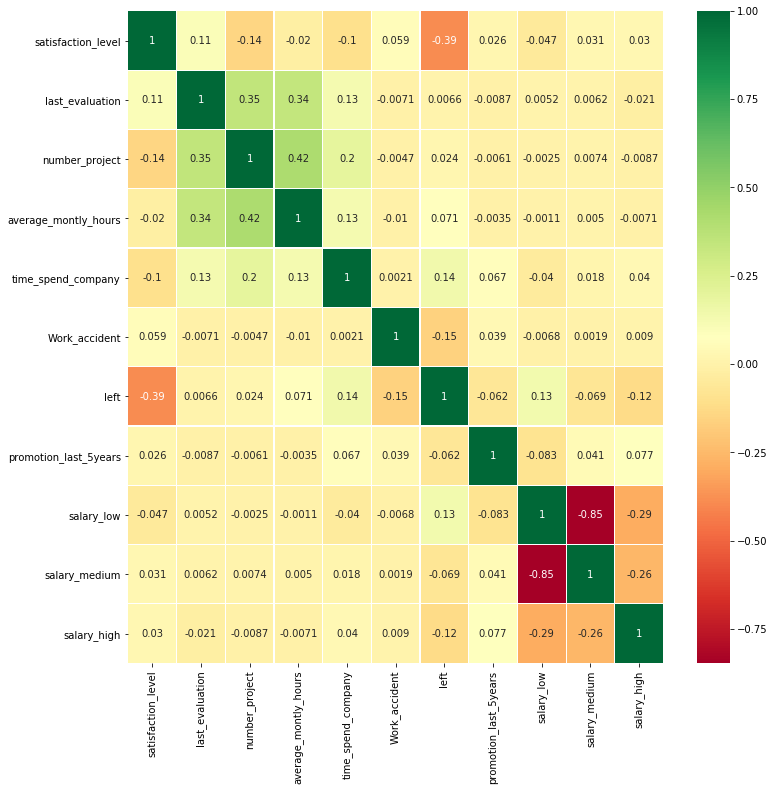

In [210]:
# Построим корреляционную матрицу еще раз
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()
# Видим, что сотрудники с низкой зарплатой увольняются чаще, чем сотрудники с высокой зарплатой, 
# хотя влияние и не такое значительное

In [ ]:
# 4. Визуализировать несколько взаимосвязей между переменными

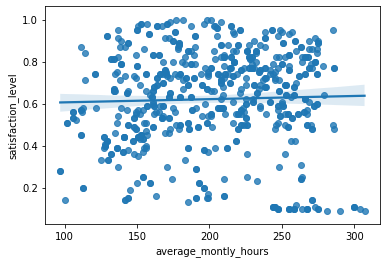

In [211]:
# Визуализируем зависимость между средним числом рабочих часов в месяц и уровнем удовлетворенности
# для начала возьмем сотрудников отдела менеджмента
management = data[data['sales']=='management']
sns.regplot(x= management.average_montly_hours, y=management.satisfaction_level, data=management, fit_reg=True)
plt.show()
# Видим слабую положительную корреляцию

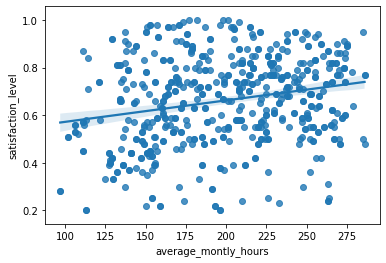

In [212]:
# Если убрать сотрудников с низкой удовлетворенностью (примем, что это выброс),
# то зависимость станет явно пложительной
management = management[management['satisfaction_level']>=0.2]
sns.regplot(x= management.average_montly_hours, y=management.satisfaction_level, data=management, fit_reg=True)
plt.show()

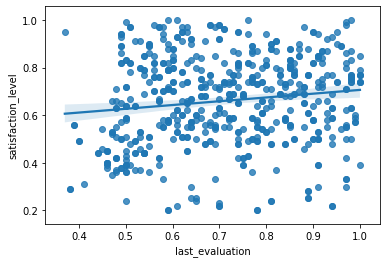

In [213]:
# Значение последней оценки для менеджмента слабо связано с уровнем удовлетворенности
sns.regplot(x= management.last_evaluation, y=management.satisfaction_level, data=management, fit_reg=True)
plt.show()

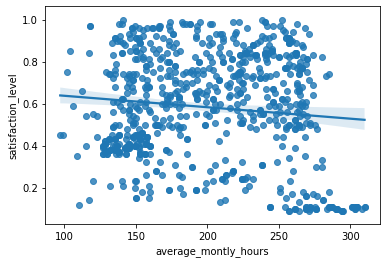

In [215]:
# Для бухгалтерии корреляция с часами работы - негативная 
accounting = data[data['sales']=='accounting']
sns.regplot(x= accounting.average_montly_hours, y=accounting.satisfaction_level, data=accounting, fit_reg=True)
plt.show()

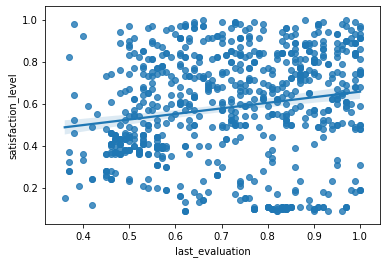

In [216]:
# Влияние же уровня последней оценки оказывается выше - положительное
sns.regplot(x= accounting.last_evaluation, y=accounting.satisfaction_level, data=accounting, fit_reg=True)
plt.show()

In [217]:
# 5. С использованием t-test статистики проверить взаимосвязи между несколькими выборками (двумя или больше)

In [218]:
# Сравним сотрудников, работающих на разных проектах, по уровню удовлетворенности
project7 = data[data['number_project']==7]['satisfaction_level']
project3 = data[data['number_project']==3]['satisfaction_level']
print(stats.ttest_ind(project7, project3))
# Нулевое значение p-value говорит о том, что они различаются

Ttest_indResult(statistic=-46.42003684781029, pvalue=0.0)


In [219]:
# Сравним сотрудников отделов менеджмента и бухгалтерии по уровню удовлетворенности
management = data[data['sales']=='management']['satisfaction_level']
accounting = data[data['sales']=='accounting']['satisfaction_level']
print(stats.ttest_ind(management, accounting))
# Низкий показатель p-value говорит о том, что между ними есть различия

Ttest_indResult(statistic=2.997254948084573, pvalue=0.002772376893987989)


In [220]:
# Сравним группы сотрудников с разным уровнем зарплаты по уровню удовлетворенности
salary_low = data[data['salary']=='low']['satisfaction_level']
salary_medium = data[data['salary']=='medium']['satisfaction_level']
salary_high = data[data['salary']=='high']['satisfaction_level']
stats.f_oneway(salary_low, salary_medium, salary_high)
# Так как результат p-value больше 0.05, то мы принимаем нулевую гипотезу о том,
# что нет различий у групп с разным уровнем оплаты

F_onewayResult(statistic=18.960895741998826, pvalue=5.967355425747657e-09)

In [ ]:
# 6..10. Исследование причин увольнений сотрудников

In [221]:
# Для того, чтобы локализовать проблему увольнений, проверим их средний уровень в разрезе отделов и проектов
# (ранее мы видели, что эти группы статистически значимы)
data.pivot_table(index = 'number_project', columns = 'sales', values = 'left', aggfunc = np.mean, fill_value = 0,
                 margins = True)
# Видим, что по сравнению со средним уровнем увольнений (24%) отделы не сильно отличаются:
# ниже уровень в отделах управления и R&D (14%-15%), чуть выше - в HR (29%). В остальных же отделах - 22%-27%.

# Гораздо сильнее разброс доли уволенных по проектам - от 2% до 100%
# Таким образом, визуально большое влияние оказывает именно принадлежность к тому или иному проекту
# При это проекты 3,4 - "благополучные" с низким уровнем увольнений (2% и 9%)
# Проект 5 - "относительно благополучный" с уровнем увольнений 22% - чуть ниже среднего по компании
# Проекты 2,6 - "неблагополучные" - 66% и 56% увольнений соответственно
# Проект 7 - 100% увольнений - возможно, проект был закрыт и все сотрудники уволены,
# либо условия работы были очень плохими

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
number_project,,,,,,,,,,,
2,0.626374,0.528736,0.722222,0.778571,0.443038,0.681818,0.590604,0.665272,0.680000,0.653465,0.656198
3,0.005764,0.012146,0.010050,0.032407,0.011696,0.012146,0.000000,0.014679,0.026846,0.029703,0.017756
4,0.066282,0.062222,0.126697,0.144144,0.062802,0.095618,0.072519,0.097479,0.080000,0.111392,0.093700
5,0.216102,0.190184,0.164286,0.223404,0.084746,0.207143,0.307692,0.230464,0.247113,0.222222,0.221659
6,0.663158,0.269231,0.681818,0.611111,0.428571,0.529412,0.323944,0.510903,0.666667,0.612903,0.557922
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
All,0.222494,0.153748,0.265971,0.290934,0.144444,0.236597,0.219512,0.244928,0.248991,0.256250,0.238083


In [233]:
# Проверим также абсолютное число уволенных по отделам
data.pivot_table(index = 'left', columns = 'number_project', values = 'salary', aggfunc = 'count', fill_value = 0,
                 margins = True)

number_project,2,3,4,5,6,7,All
left,,,,,,,
0,821,3983,3956,2149,519,0,11428
1,1567,72,409,612,655,256,3571
All,2388,4055,4365,2761,1174,256,14999


In [ ]:
# Проверим также абсолютное число уволенных по проектам
data.pivot_table(index = 'left', columns = 'sales', values = 'salary', aggfunc = 'count', fill_value = 0,
                 margins = True)
# Замечаем, что число уволенных в HR - всего 215 человек (6% от общего числа покинувших компанию),
# поэтому высокая доля уволенных здесь не объясняет проблему

In [224]:
# Проверим уровень удовлетворенности в разрезе отедлов и проектов
data.pivot_table(index = 'number_project', columns = 'sales', values = 'satisfaction_level', aggfunc = np.mean, fill_value = 0,
                 margins = True)
# Аналогично увольнениям, уровень удовлетворенности не сильно отличается в разных отделах (около средниего 60%)
# В разрезе проектов уровень удовлетворенности сильно разнится
# В "благополучных" отделах 3,4,5 он приближается к 70%
# В "неблагополучных" 2,6 - 47% и 27% соответственно (заметим, что это не пропорционально уровню увольнений) 
# В 7-м проекте он составляет 12% - люди крайне не удовлетворены работой

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
number_project,,,,,,,,,,,
2,0.485659,0.480920,0.454444,0.432429,0.516962,0.483636,0.489195,0.481116,0.480600,0.479926,0.478769
3,0.689625,0.672308,0.653819,0.708981,0.676550,0.696883,0.680596,0.696972,0.691275,0.679533,0.687670
4,0.714323,0.687689,0.684434,0.681757,0.673623,0.696853,0.687939,0.695983,0.704062,0.694418,0.695132
5,0.665042,0.641043,0.640643,0.685957,0.673983,0.680786,0.694142,0.676993,0.684827,0.699786,0.678888
6,0.251579,0.372885,0.246515,0.216481,0.334286,0.243725,0.379577,0.288505,0.235690,0.253024,0.273458
7,0.102500,0.099231,0.128000,0.101538,0.146923,0.100000,0.098750,0.107313,0.107692,0.152241,0.118711
All,0.618142,0.619822,0.582151,0.598809,0.621349,0.618601,0.619634,0.614447,0.618300,0.607897,0.612834


In [225]:
# Попробуем проверить средний уровень нагрузки в разрезе отделов и проектов
data.pivot_table(index = 'number_project', columns = 'sales', values = 'average_montly_hours', aggfunc = np.mean, fill_value = 0,
                 margins = True)
# Здесь опять отмечаем существенные различия только на уровне проектов
# Проект 7 - чудовищный уровень нагрузки
# Проекты 5,6 - высокий
# 2,3,4 - средний и низкий уровень

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
number_project,,,,,,,,,,,
2,159.835165,158.356322,158.753968,152.021429,171.202532,155.272727,164.758389,163.536960,156.805714,159.952970,160.342546
3,196.296830,193.550607,197.462312,198.486111,202.070175,200.380567,199.668085,196.842202,197.102349,197.739745,197.507522
4,204.498559,205.764444,204.067873,207.418919,203.507246,205.593625,200.854962,206.236134,205.876923,204.251899,205.122108
5,216.932203,216.993865,210.121429,207.414894,203.042373,211.121429,211.207101,211.676821,213.623557,211.495127,212.061572
6,241.273684,218.346154,249.075758,246.611111,218.190476,242.196078,226.140845,237.573209,239.695402,244.580645,238.694208
7,291.800000,263.461538,269.266667,293.153846,266.076923,276.933333,282.750000,275.537313,273.423077,273.413793,276.078125
All,202.215974,200.800508,201.162973,198.684709,201.249206,199.385781,199.965632,200.911353,200.758188,202.497426,201.050337


In [226]:
# Проверяем среднюю продолжительность работы в компании в разрезе отделов и проектов
data.pivot_table(index = 'number_project', columns = 'sales', values = 'time_spend_company', aggfunc = np.mean, fill_value = 0,
                 margins = True)
# Существенных различий здесь не видим, только в проектах 5,6,7 он выше среднего на 8%-20%

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
number_project,,,,,,,,,,,
2,3.137363,3.149425,3.230159,3.135714,3.759494,3.337662,3.087248,3.165969,3.171429,3.101485,3.180486
3,3.239193,3.040486,3.336683,3.087963,4.491228,3.368421,3.170213,3.362385,3.192953,3.123055,3.286560
4,3.512968,3.217778,3.656109,3.373874,4.386473,3.501992,3.526718,3.449580,3.255385,3.353165,3.454983
5,3.627119,3.717791,3.614286,3.670213,4.305085,3.942857,3.840237,3.887417,3.736721,3.736842,3.800072
6,4.242105,4.615385,3.848485,4.129630,4.285714,4.411765,4.112676,4.320872,4.080460,4.064516,4.192504
7,4.150000,4.230769,4.200000,4.384615,3.846154,4.066667,4.062500,4.014925,4.076923,4.206897,4.113281
All,3.468623,3.367217,3.522816,3.355886,4.303175,3.569930,3.475610,3.534058,3.393001,3.411397,3.498233


In [227]:
# Проверяем средний уровень несчатсных случаев в разрезе отделов и проектов
data.pivot_table(index = 'number_project', columns = 'sales', values = 'Work_accident', aggfunc = np.mean, fill_value = 0,
                 margins = True)
# Он не сильно разнится по отделам в среднем, видим только отдельные очаги: R&D в проектах 5,6,7, а также
# Product Management в 3-м проекте.
# Интересно, что в 7-м проекте нет несчастных случаев среди
# сотрудников всех отделов кроме R&D и Support - возможно проект закрыли до старта активной работы других отделов(?)
# Проверяем средний уровень несчатсных случаев в разрезе отделов и проектов
# Во всяком случае визуально не видно, что уровень мог стать важным фактором в причинах увольнений

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
number_project,,,,,,,,,,,
2,0.054945,0.057471,0.087302,0.100000,0.215190,0.084416,0.093960,0.105997,0.088571,0.076733,0.092965
3,0.164265,0.174089,0.160804,0.148148,0.187135,0.190283,0.212766,0.168807,0.169463,0.186704,0.175092
4,0.164265,0.160000,0.099548,0.130631,0.149758,0.179283,0.156489,0.149580,0.181538,0.159494,0.156472
5,0.148305,0.214724,0.192857,0.106383,0.169492,0.178571,0.112426,0.139073,0.161663,0.136452,0.150670
6,0.052632,0.230769,0.060606,0.074074,0.071429,0.156863,0.112676,0.137072,0.137931,0.088710,0.114140
7,0.000000,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.015625
All,0.133659,0.170267,0.125163,0.120433,0.163492,0.160839,0.146341,0.141787,0.154778,0.140074,0.144610


In [228]:
# Проверяем средний уровень параметра "последняя оценка" (предполагаю, что это уровень оценки работы сотрудников)
data.pivot_table(index = 'number_project', columns = 'sales', values = 'last_evaluation', aggfunc = np.mean, fill_value = 0,
                 margins = True)
# По отделам нет принципиальных различий. Выделяются проекты 2 (низкий уровень оценок) и 7 (высокий уровень оценок) 

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
number_project,,,,,,,,,,,
2,0.582418,0.573563,0.543810,0.537000,0.588101,0.560390,0.581074,0.571311,0.567314,0.570446,0.568505
3,0.700692,0.714089,0.725729,0.722083,0.743041,0.723806,0.702809,0.709780,0.721544,0.722900,0.716572
4,0.737983,0.719067,0.749457,0.743468,0.731111,0.752829,0.743664,0.737319,0.744185,0.740911,0.740009
5,0.759280,0.746258,0.783143,0.788404,0.745339,0.762286,0.771006,0.756000,0.774342,0.756901,0.762010
6,0.814105,0.759615,0.771212,0.790000,0.765000,0.778039,0.764930,0.773614,0.808563,0.797863,0.786550
7,0.890000,0.863846,0.758667,0.836154,0.860000,0.919333,0.845000,0.871940,0.904231,0.833793,0.859609
All,0.716830,0.712122,0.717718,0.708850,0.724000,0.715886,0.714756,0.709717,0.723109,0.721099,0.716102


In [229]:
# Проверяем средний уровень продвижений сотрудников в разрезе отделов и проектов
data.pivot_table(index = 'number_project', columns = 'sales', values = 'promotion_last_5years', aggfunc = np.mean, fill_value = 0,
                 margins = True)
# Видим высокий уровень у отделе управления (что логично - туда могли продвигать сотрудников),
# низкий уровень продвижений в IT и Поддержке
# В проеках 3,4 - высокий уровень продвижений, в проектах 2,5,6 - средний, нет продвижений в 7-м проекте 

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
number_project,,,,,,,,,,,
2,0.016484,0.034483,0.000000,0.014286,0.101266,0.038961,0,0.012552,0.014286,0.002475,0.015494
3,0.000000,0.024291,0.020101,0.032407,0.140351,0.060729,0,0.026606,0.005034,0.009901,0.023428
4,0.000000,0.035556,0.009050,0.022523,0.125604,0.075697,0,0.033613,0.009231,0.013924,0.026804
5,0.000000,0.036810,0.057143,0.000000,0.059322,0.021429,0,0.023841,0.006928,0.009747,0.018109
6,0.000000,0.076923,0.000000,0.018519,0.095238,0.000000,0,0.012461,0.017241,0.016129,0.017036
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
All,0.002445,0.034307,0.018253,0.020298,0.109524,0.050117,0,0.024155,0.008973,0.010294,0.021268


In [230]:
# Проверяем среднюю долю сотрудников с низкой зарплатой
data.pivot_table(index = 'number_project', columns = 'sales', values = 'salary_low', aggfunc = np.mean, fill_value = 0,
                 margins = True)
# Видим высокий уровень у отделе управления (что логично - туда могли продвигать сотрудников),


sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
number_project,,,,,,,,,,,
2,0.604396,0.517241,0.507937,0.400000,0.405063,0.519481,0.543624,0.616457,0.648571,0.512376,0.562814
3,0.440922,0.461538,0.437186,0.458333,0.245614,0.380567,0.446809,0.449541,0.454698,0.475248,0.441677
4,0.463977,0.457778,0.506787,0.459459,0.294686,0.494024,0.507634,0.470588,0.481538,0.529114,0.478121
5,0.555085,0.447853,0.392857,0.574468,0.228814,0.457143,0.520710,0.515232,0.471132,0.452242,0.477001
6,0.473684,0.519231,0.469697,0.333333,0.357143,0.588235,0.450704,0.551402,0.666667,0.572581,0.539182
7,0.450000,0.153846,0.600000,0.461538,0.230769,0.666667,0.750000,0.611940,0.576923,0.637931,0.562500
All,0.496333,0.462516,0.466754,0.453315,0.285714,0.468531,0.500000,0.507005,0.514132,0.504412,0.487766


In [231]:
# Распределение сотрудников по уровню зарплаты в разрезе отделов
data.pivot_table(index = 'salary', columns = 'sales', values = 'number_project', aggfunc = 'count', fill_value = 0,
                 margins = True)

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
salary,,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201,1237
low,609,364,358,335,180,402,451,2099,1146,1372,7316
medium,535,372,335,359,225,376,383,1772,942,1147,6446
All,1227,787,767,739,630,858,902,4140,2229,2720,14999


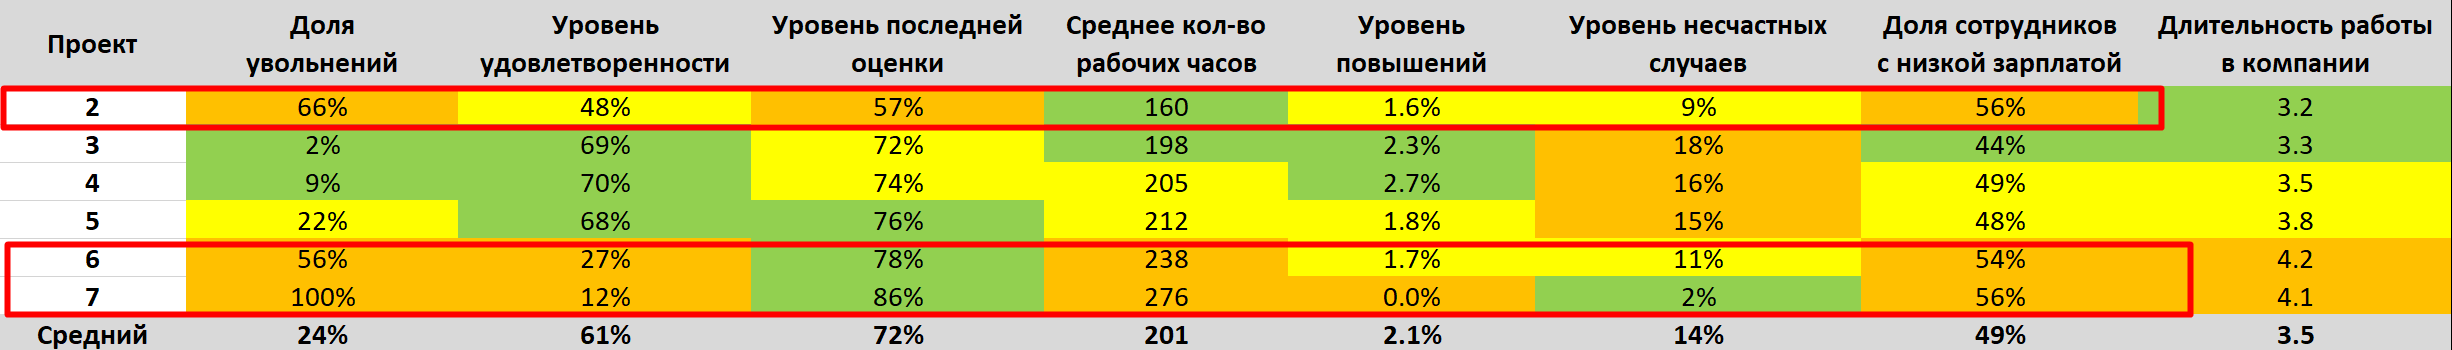

In [234]:
Image('project_comparison.png')
# В целом видим, что наиболее вероятной причиной увольнений являются проблемы в проектах 2,6,7
# Из этих проектов уволилось 2478 сотрудников - почти 70% от общего числа уволившихся
# при том, что в них работало только 25% всех сотрудников
# Из имеющихся данных видим, что люди в этих проектах работают существенно больше нормы (особенно проекты 6,7),
# среди них высокий процент сотрудников с низкой долей зарплаты и низкий уровень повышений.
# Вероятно, это объясняет низкий уровень удовлетворенности, и как следствие - высокую текучесть кадров